In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

dataRoot = "/Users/sora/data"
dataFolder = "starInABox/dataTables"
fullDataPath = Path(dataRoot, dataFolder)

Original column names and New column names
- ```Time``` <--> ```time```
- ``` Radius (R_sun)``` <--> ```Rsun```
- ``` Luminosity (L_sun)``` <--> ```Lsun```
- ``` Surface Temperature (K)``` <--> ```K```
- ``` Mass (M_sun)``` <--> ```Msun```

Note original column names had a space before each desciptor variable name, and that needs included when calling the rename function in pandas

If you want to compare different mass stars, than look at ```allMassesDataFrame```, which will be generated in the next code block.

In [86]:
CSVFiles = []
for path in fullDataPath.glob('star_*_solar_mass.csv'):
    CSVFiles.append(path)
    
frames = []
for file in CSVFiles:
    frame = pd.read_csv(file, comment='#')
    frame = frame.rename(columns={"Time" : "time", " Radius (R_sun)" : "Rsun", " Luminosity (L_sun)" : "Lsun", " Surface Temperature (K)" : "K", " Mass (M_sun)" : "Msun"})
    frame['massFromFile'] = str(file)[len("/Users/sora/data/starInABox/dataTables/star_"):].split('_')[0]
    frames.append(frame)
    
allMassesDataFrame = pd.concat(frames)
allMassesDataFrame = allMassesDataFrame.reset_index()

In [87]:
allMassesDataFrame

,index,time,Rsun,Lsun,K,Msun,massFromFile
0,0,0.0000,5.999,42844.98548,34056,20.000,20
1,1,0.4338,6.157,43933.92456,33830,19.984,20
2,2,0.8679,6.321,45133.60253,33612,19.967,20
3,3,1.3025,6.492,46451.52752,33404,19.950,20
4,4,1.7376,6.674,47907.11300,33205,19.931,20
...,...,...,...,...,...,...,...
6709,306,10638.5620,0.000,0.00000,5962,1.369,10
6710,307,11138.5620,0.000,0.00000,5826,1.369,10
6711,308,11638.5620,0.000,0.00000,5700,1.369,10
6712,309,12000.0000,0.000,0.00000,5613,1.369,10


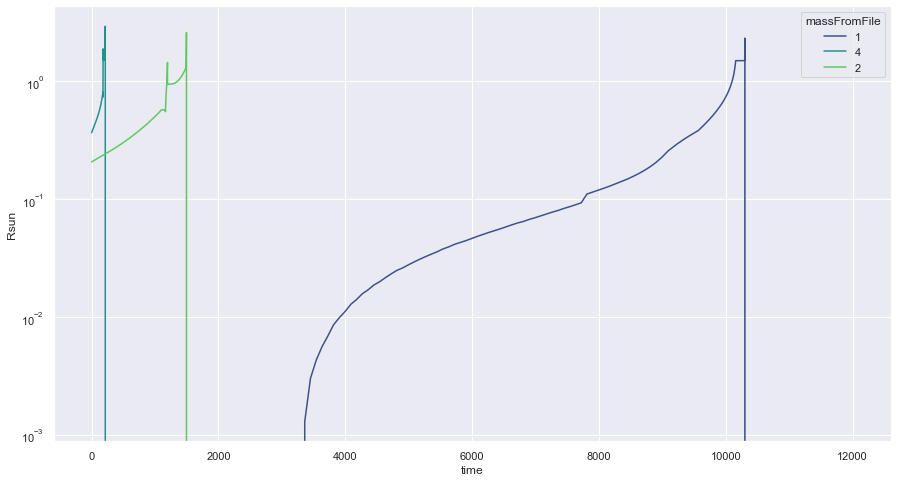

In [100]:
yScaleLog = True
palette = "viridis"
x = "time"
y = "Rsun"
hue = "massFromFile"
massesToLookAt = [1, 2, 4]

data = allMassesDataFrame
massesToLookAt = list(map(str, massesToLookAt))
data = data[data["massFromFile"].isin(massesToLookAt)]

sns.set(rc = {'figure.figsize':(15,8)})
if yScaleLog:
    plt.yscale('log')
    sns.lineplot(data=data, x=x, y=y, hue=hue, palette=palette)

### Want to look at a single star of a certain mass value without the other stars (of varying masses)? 

```masses``` defines all the mass values available in the CSV files in the data folder. Those values are:

```[0.2, 0.65, 1, 2, 4, 6, 10, 20, 30, 40]```

So in line 2, changes mass`[0]` to whatever massvalue you want in that list above by referencing the index value
```0 = 0.2```, ```1 = 0.65```, ..., ```8 = 30```, ```9 = 40```

In [ ]:
masses = [0.2, 0.65, 1, 2, 4, 6, 10, 20, 30, 40] 
mass = masses[0] # 0 = 0.2, 1 = 0.65, ..., 8 = 30, 9 = 40
print("Data Frame (df) for mass {}".format(mass))

dataTableFileTemplate = "star_{}_solar_mass.csv".format(str(mass))
fullDataFilePath = Path(fullDataPath, dataTableFileTemplate)

df = pd.read_csv(fullDataFilePath, comment='#')
df = df.rename(columns={"Time" : "time", " Radius (R_sun)" : "Rsun", " Luminosity (L_sun)" : "Lsun", " Surface Temperature (K)" : "K", " Mass (M_sun)" : "Msun"})
df.head()